# Advanced Movie Recommendation System

This notebook implements a **Hybrid Movie Recommendation System** that combines **content-based filtering** (using TF-IDF and K-Nearest Neighbors) and **collaborative filtering** (based on user ratings).

## Features:
- **Exploratory Data Analysis (EDA):**
  - Distribution of movie ratings.
  - Word cloud visualization for movie overviews.
- **Hybrid Recommendation Approach:**
  - Content-based filtering using TF-IDF vectorization of movie overviews.
  - Collaborative filtering based on movie vote averages.
- **Interactive User Input Form:**
  - Users can enter a favorite movie, describe the type of movie they want, and add journal notes.
  - Movie recommendations are displayed in a tabular format.
  - Journal entries allow users to log their thoughts on recommended movies.
- **Model Evaluation Metrics:**
  - Precision, Recall, and F1-score for recommendation quality.
  - Mean Squared Error (MSE) for collaborative filtering evaluation.

## Technologies Used:
- **Pandas & NumPy** for data handling.
- **Scikit-learn** for machine learning models (KNN-based recommendation system).
- **Matplotlib & Seaborn** for visualizing movie rating distribution.
- **WordCloud** for generating a visualization of movie descriptions.
- **ipywidgets** for interactive user input.



## 1. Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


## 2. Load and Preprocess the Dataset

In [8]:
# Load the dataset
tmdb = pd.read_csv('TMDB_movie_dataset_v11.csv')


In [9]:
# Display the first few rows
tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [10]:
# Preprocessing: Handle missing values
tmdb = tmdb.dropna(subset=['title', 'revenue', 'vote_average', 'runtime', 'genres'])


In [11]:
# TF-IDF Vectorization for content-based filtering
tfidf = TfidfVectorizer(stop_words='english')
tmdb['overview'] = tmdb['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(tmdb['overview'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


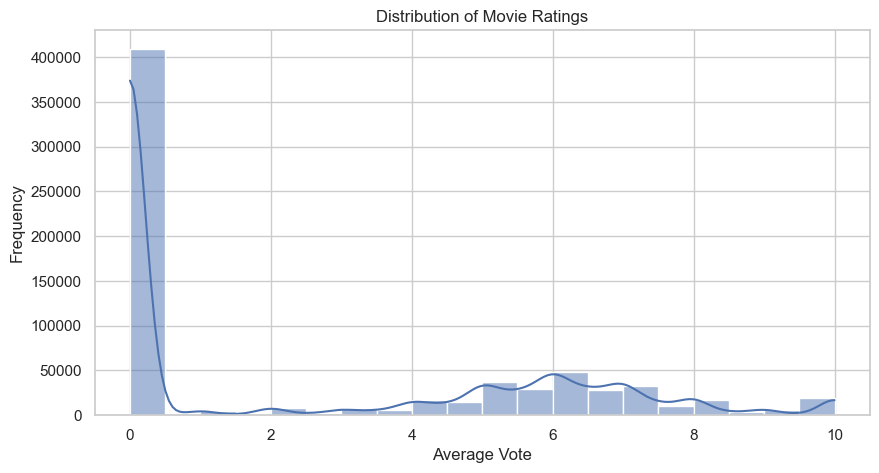

In [15]:
# EDA - Distribution of Vote Averages
plt.figure(figsize=(10, 5))
sns.histplot(tmdb['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Vote')
plt.ylabel('Frequency')
plt.show()

#### 1. KeyTakeAway From: Distribution of Movie Ratings
- The majority of movies have very low ratings, with a large concentration around 0 to 2.
- A significant portion of movies has ratings between 5 and 8, indicating a more common range for moderately rated films.
- The distribution suggests that many movies receive minimal or no votes, which could impact recommendation reliability.
- A long tail is observed, with fewer movies achieving high ratings close to 10.

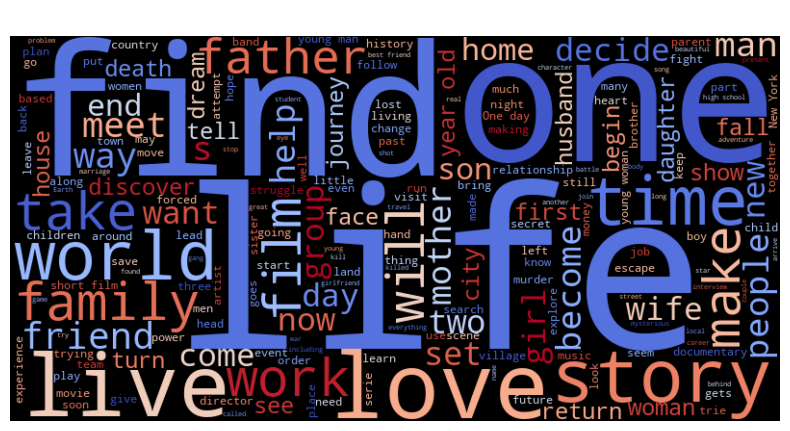

In [17]:
# Generate the word cloud from the movie overviews
text = ' '.join(tmdb['overview'].dropna())

# Create the word cloud with custom settings for colors, size, and appearance
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black',  # Set a black background for a contrast effect
    colormap='coolwarm',  # Use a vibrant color palette
    max_words=200,  # Limit the number of words
    contour_width=3,  # Add a contour to the words
    contour_color='white',  # White contour to make words pop
    random_state=42  # Fix the seed for reproducibility
).generate(text)

# Display the word cloud with a clean figure
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Customize the title with a bold font and eye-catching color
plt.title('Word Cloud of Movie Overviews', fontsize=18, weight='bold', color='white', loc='center')

# Show the word cloud
plt.show()

#### 2. KeyTakeAway From:Word Cloud of Movie Overviews
- The most frequently occurring words in movie descriptions include "life," "film," "love," "story," "father," "family," "friend," and "help".
- Common themes revolve around relationships, emotions, personal struggles, and journeys.
- The prominence of words like "world," "time," "work," and "live" suggests a mix of genres, including drama, adventure, and biographical films.
- This word cloud helps in identifying dominant themes and genres in the dataset, which can aid in improving content-based recommendations.

## 3. Collaborative Filtering
- **Using K-Nearest Neighbors (KNN) for collaborative filtering:**

In [20]:
# KNN for collaborative filtering using vote average
vote_matrix = tmdb[['vote_average']].values
collab_knn = NearestNeighbors(n_neighbors=10, metric='euclidean')
collab_knn.fit(vote_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=10)

## 4. Content-Based Filtering
- **Using TF-IDF Vectorization for text-based recommendation based on movie descriptions, titles, or genres:**

In [23]:
# KNN for content-based similarity
content_knn = NearestNeighbors(metric='cosine', algorithm='brute')
content_knn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## 5. Hybrid Filtering (Combine Collaborative + Content-based)
- **You can create a hybrid recommendation system that combines both collaborative filtering (using user data) and content filtering (using movie data):**

In [25]:
# Hybrid recommendation function
def hybrid_recommendations(movie_title):
    if movie_title not in tmdb['title'].values:
        return f"Movie '{movie_title}' not found."
    
    movie_idx = tmdb[tmdb['title'] == movie_title].index[0]
    
    # Content-based recommendations
    _, content_indices = content_knn.kneighbors(tfidf_matrix[movie_idx], n_neighbors=5)
    content_recommendations = tmdb.iloc[content_indices[0]][['title', 'overview', 'genres', 'vote_average']]
    
    # Collaborative recommendations
    _, collab_indices = collab_knn.kneighbors(vote_matrix[movie_idx].reshape(1, -1), n_neighbors=5)
    collab_recommendations = tmdb.iloc[collab_indices[0]][['title', 'overview', 'genres', 'vote_average']]
    
    # Combine results
    final_recommendations = pd.concat([content_recommendations, collab_recommendations]).drop_duplicates().reset_index(drop=True)
    
    return final_recommendations


In [26]:
# User journal dictionary
user_journal = {}

def add_to_journal(user, movie_title, note):
    if user not in user_journal:
        user_journal[user] = []
    user_journal[user].append({'movie': movie_title, 'note': note})
    return f"Added to {user}'s journal: {movie_title} - {note}"


In [35]:
# Create input form for user interaction
movie_input = widgets.Text(placeholder='Enter your favorite movie')
description_input = widgets.Text(placeholder='Describe the type of movie you want')
journal_input = widgets.Text(placeholder='Add a journal note')
recommend_button = widgets.Button(description='Get Recommendations')
output = widgets.Output()

def on_recommend_click(b):
    with output:
        output.clear_output()
        movie_title = movie_input.value
        recommendations = hybrid_recommendations(movie_title)
        if recommendations.empty:
            print(f"No recommendations found for '{movie_title}'.")
        else:
            display(recommendations)
        if journal_input.value:
            add_to_journal("User", movie_title, journal_input.value)
            print(f"Journal Entry Added: {journal_input.value}")

recommend_button.on_click(on_recommend_click)

display(movie_input, description_input, journal_input, recommend_button, output)

Text(value='', placeholder='Enter your favorite movie')

Text(value='', placeholder='Describe the type of movie you want')

Text(value='', placeholder='Add a journal note')

Button(description='Get Recommendations', style=ButtonStyle())

Output()

## Model Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
true_ratings = tmdb['vote_average'].values
predicted_ratings = collab_knn.kneighbors(vote_matrix, return_distance=False)
predicted_means = np.mean(vote_matrix[predicted_ratings], axis=1)
mse = mean_squared_error(true_ratings, predicted_means)
print(f"Mean Squared Error (MSE) of Collaborative Filtering: {mse:.4f}")
